# **Import Libraries**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from keras.callbacks import LearningRateScheduler
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import TensorBoard
from sklearn.metrics import confusion_matrix, classification_report

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Facial Dataset Configuration: Setting Picture Size and Folder Path**

In [2]:
# Set your picture size
picture_size = 48

# Define your folder path and expression
folder_path = "/kaggle/input/facial-dataset/facial dataset"

# **Visualization of 'Happy' Facial Expressions**

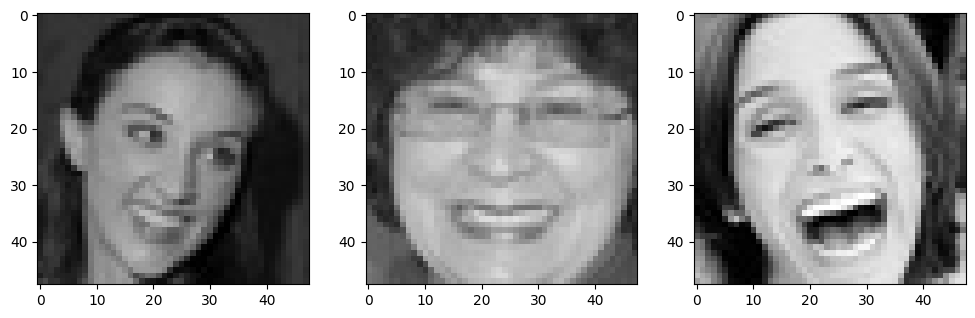

In [3]:
expression = 'happy'

images = os.listdir(os.path.join(folder_path, "train", expression))

# Create a 3x3 grid of subplots to display the images
plt.figure(figsize=(12, 12))
for i in range(1, 4):  # Display the first 3 images
    plt.subplot(3, 3, i)
    img = load_img(os.path.join(folder_path, "train", expression, images[i]), target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('on')  # Turn off axis labels
plt.show()

# **Visualization of 'Angry' Facial Expressions**

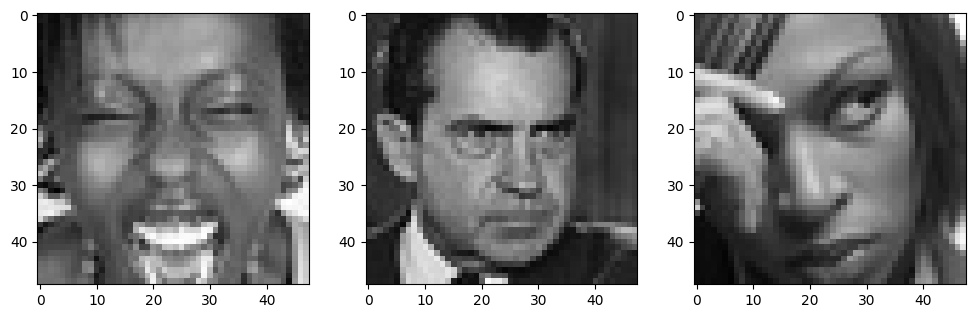

In [4]:
expression = 'angry'

images = os.listdir(os.path.join(folder_path, "train", expression))

# Create a 3x3 grid of subplots to display the images
plt.figure(figsize=(12, 12))
for i in range(1, 4):  # Display the first 3 images
    plt.subplot(3, 3, i)
    img = load_img(os.path.join(folder_path, "train", expression, images[i]), target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('on')  # Turn off axis labels
plt.show()

# **Visualization of 'Sad' Facial Expressions**

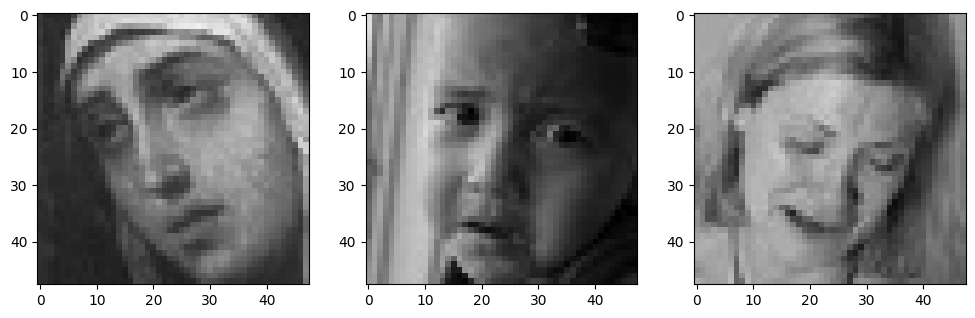

In [5]:
expression = 'sad'

images = os.listdir(os.path.join(folder_path, "train", expression))

# Create a 3x3 grid of subplots to display the images
plt.figure(figsize=(12, 12))
for i in range(1, 4):  # Display the first 3 images
    plt.subplot(3, 3, i)
    img = load_img(os.path.join(folder_path, "train", expression, images[i]), target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('on')  # Turn off axis labels
plt.show()

# **Visualization of 'Fear' Facial Expressions**

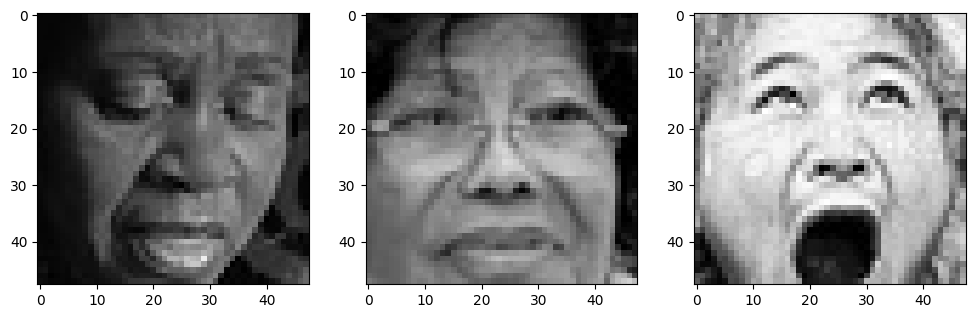

In [6]:
expression = 'fear'

images = os.listdir(os.path.join(folder_path, "train", expression))

# Create a 3x3 grid of subplots to display the images
plt.figure(figsize=(12, 12))
for i in range(1, 4):  # Display the first 3 images
    plt.subplot(3, 3, i)
    img = load_img(os.path.join(folder_path, "train", expression, images[i]), target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('on')  # Turn off axis labels
plt.show()

# **Visualization of 'Neutral' Facial Expressions**

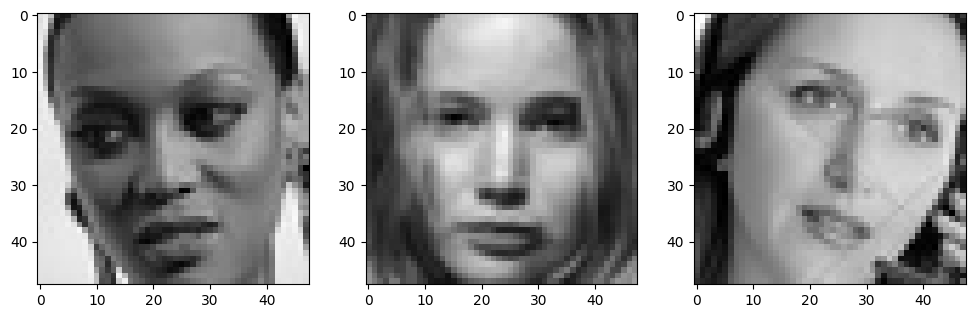

In [7]:
expression = 'neutral'

images = os.listdir(os.path.join(folder_path, "train", expression))

# Create a 3x3 grid of subplots to display the images
plt.figure(figsize=(12, 12))
for i in range(1, 4):  # Display the first 3 images
    plt.subplot(3, 3, i)
    img = load_img(os.path.join(folder_path, "train", expression, images[i]), target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('on')  # Turn off axis labels
plt.show()

# **Visualization of 'Disgust' Facial Expressions**

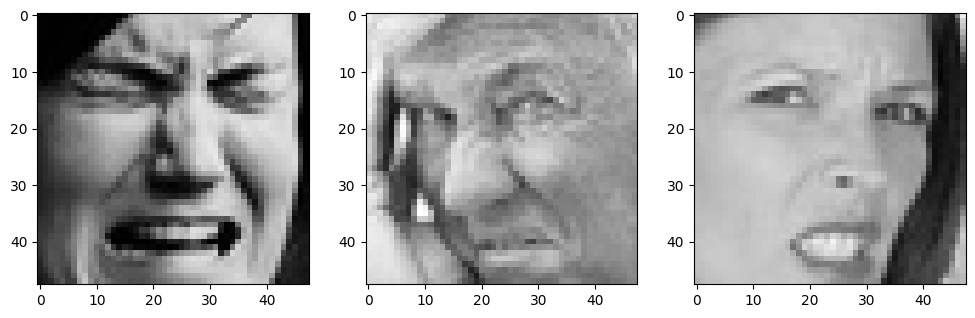

In [8]:
expression = 'disgust'

images = os.listdir(os.path.join(folder_path, "train", expression))

# Create a 3x3 grid of subplots to display the images
plt.figure(figsize=(12, 12))
for i in range(1, 4):  # Display the first 3 images
    plt.subplot(3, 3, i)
    img = load_img(os.path.join(folder_path, "train", expression, images[i]), target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('on')  # Turn off axis labels
plt.show()

# **Visualization of 'Surprise' Facial Expressions**

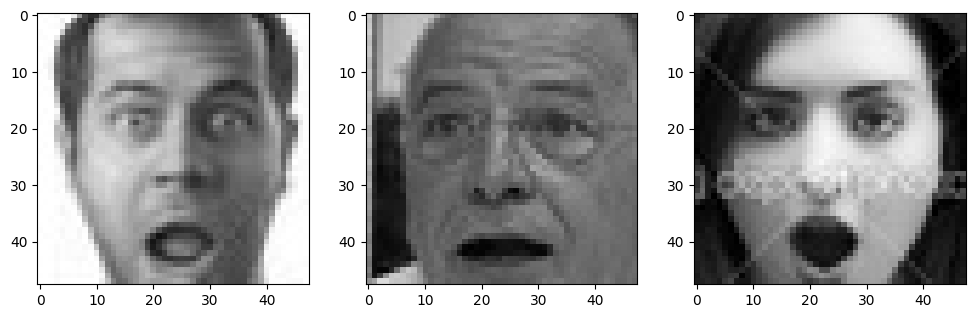

In [9]:
expression = 'surprise'

images = os.listdir(os.path.join(folder_path, "train", expression))

# Create a 3x3 grid of subplots to display the images
plt.figure(figsize=(12, 12))
for i in range(1, 4):  # Display the first 3 images
    plt.subplot(3, 3, i)
    img = load_img(os.path.join(folder_path, "train", expression, images[i]), target_size=(picture_size, picture_size))
    plt.imshow(img)
    plt.axis('on')  # Turn off axis labels
plt.show()

# **Facial Dataset Loading and Preprocessing**

In [10]:
batch_size=128
datagen_train = ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set = datagen_train.flow_from_directory(
    os.path.join(folder_path, "train"),  
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True
)

test_set = datagen_val.flow_from_directory(
    os.path.join(folder_path, "test"), 
    target_size=(picture_size, picture_size),
    color_mode="grayscale",
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 57530 images belonging to 7 classes.
Found 14244 images belonging to 7 classes.


# **Convolutional Neural Network (CNN) Architecture**

In [11]:
no_of_classes = 7

class_labels = train_set.classes
classes = np.unique(class_labels)
class_weights = compute_class_weight('balanced', classes=classes, y=class_labels)
class_weight_dict = dict(enumerate(class_weights))

model = Sequential()

# 1st CNN layer
model.add(Conv2D(64, (3, 3), padding="same", input_shape=(48, 48, 1)))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd CNN layer
model.add(Conv2D(128, (5, 5), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd CNN layer
model.add(Conv2D(512, (3, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 5th CNN layer
model.add(Conv2D(512, (3, 3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected 1st layer with L2 regularization
model.add(Dense(256, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Increase dropout rate

# Fully connected layer 2nd layer with L2 regularization
model.add(Dense(512, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Increase dropout rate

# Fully connected layer 3rd layer with L2 regularization
model.add(Dense(512, kernel_regularizer=l2(0.001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))  # Increase dropout rate

model.add(Dense(no_of_classes, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

# **Callbacks and Training Configuration**

In [12]:
checkpoint = ModelCheckpoint("./face_emotion_model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=5,
                              verbose=1,
                              min_delta=0.001)

# Learning Rate Warm-up
warmup_epochs = 20
initial_lr = 0.001
final_lr = 0.01

def lr_scheduler(epoch, lr):
    if epoch < warmup_epochs:
        lr = initial_lr + epoch * ((final_lr - initial_lr) / warmup_epochs)
    return lr

scheduler = LearningRateScheduler(lr_scheduler)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, batch_size=batch_size, write_graph=True, write_grads=False, write_images=False)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate, scheduler, tensorboard]

epochs = 200

model.compile(loss='categorical_crossentropy',
              optimizer = RMSprop(lr=initial_lr),
              metrics=['accuracy'])

# **Training the Facial Expression Recognition Model**

In [13]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                class_weight=class_weight_dict,
                                callbacks=callbacks_list
                                )

Epoch 1/200


2023-12-16 16:14:50.631706: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


449/449 [==============================] - 176s 364ms/step - loss: 3.0694 - accuracy: 0.1644 - val_loss: 2.8412 - val_accuracy: 0.1860 - lr: 0.0010
Epoch 2/200
449/449 [==============================] - 54s 119ms/step - loss: 2.1504 - accuracy: 0.2701 - val_loss: 1.7584 - val_accuracy: 0.3839 - lr: 0.0014
Epoch 3/200
449/449 [==============================] - 55s 123ms/step - loss: 1.8000 - accuracy: 0.3674 - val_loss: 1.7700 - val_accuracy: 0.3476 - lr: 0.0019
Epoch 4/200
449/449 [==============================] - 52s 117ms/step - loss: 1.7173 - accuracy: 0.4108 - val_loss: 1.6246 - val_accuracy: 0.4317 - lr: 0.0023
Epoch 5/200
449/449 [==============================] - 53s 118ms/step - loss: 1.6724 - accuracy: 0.4386 - val_loss: 1.8249 - val_accuracy: 0.3369 - lr: 0.0028
Epoch 6/200
449/449 [==============================] - 53s 119ms/step - loss: 1.6611 - accuracy: 0.4518 - val_loss: 1.7793 - val_accuracy: 0.3903 - lr: 0.0033
Epoch 7/200
449/449 [==============================] - 52

# **Saving the Weights**

In [14]:
model.save_weights('face_emotion_model.h5')

# **Saving the Architecture**

In [15]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# **Evaluating and Printing Test Loss and Accuracy**

In [16]:
test_loss, test_accuracy = model.evaluate(test_set, steps=test_set.n // test_set.batch_size)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

111/111 [==============================] - 11s 103ms/step - loss: 0.3480 - accuracy: 0.9288
Test Loss: 0.3480
Test Accuracy: 0.9288


# **Generating Predictions and Printing Classification Report**

In [17]:
# Generate predictions for the test set
predictions = model.predict(test_set)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert true labels to class labels
true_labels = test_set.classes

# Get class names
class_names = list(test_set.class_indices.keys())

# Print classification report
print("Classification Report:\n", classification_report(true_labels, predicted_labels, target_names=class_names))

112/112 [==============================] - 12s 103ms/step
Classification Report:
               precision    recall  f1-score   support

       angry       0.92      0.91      0.91      1918
     disgust       0.95      0.94      0.94       222
        fear       0.92      0.89      0.91      2042
       happy       0.97      0.96      0.97      3599
     neutral       0.91      0.93      0.92      2449
         sad       0.89      0.90      0.90      2386
    surprise       0.94      0.96      0.95      1628

    accuracy                           0.93     14244
   macro avg       0.93      0.93      0.93     14244
weighted avg       0.93      0.93      0.93     14244



# **Training Progress Visualization**

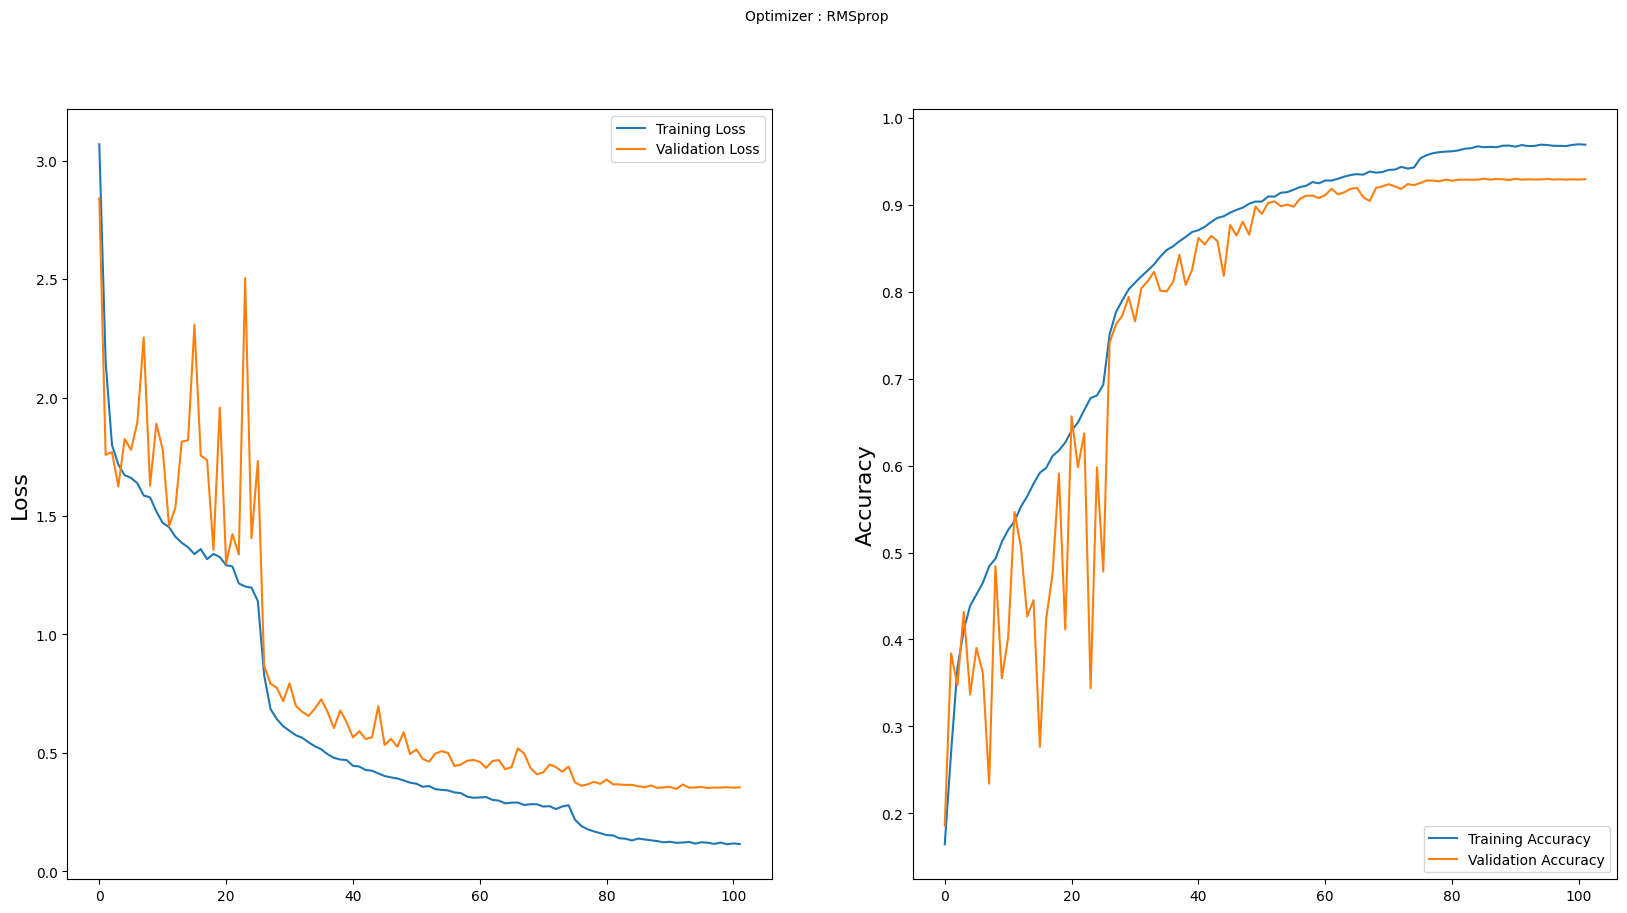

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : RMSprop', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

# **Confusion Matrix Visualization**

112/112 [==============================] - 11s 98ms/step


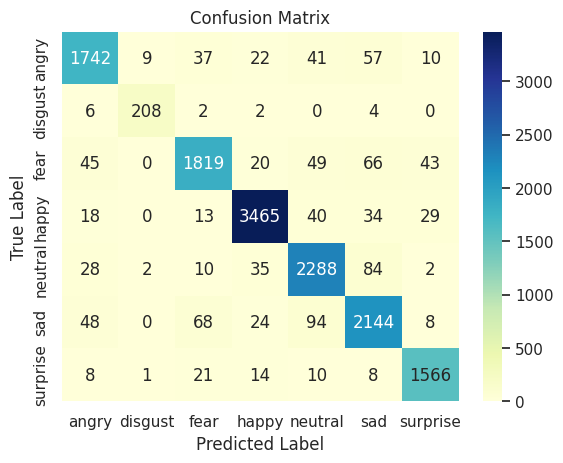

In [19]:
# Get the true labels and predicted labels for the validation set
validation_labels = test_set.classes
validation_pred_probs = model.predict(test_set)
validation_pred_labels = np.argmax(validation_pred_probs, axis=1)

# Compute the confusion matrix
confusion_mtx = confusion_matrix(validation_labels, validation_pred_labels)
class_names = list(train_set.class_indices.keys())
sns.set()
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='YlGnBu', 
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()